In [1]:
import numpy as np
import matplotlib.pyplot as plt
from labellines import labelLines

# Utility

The utility module contains the following functions used in the cropchoice model.

1. expected_value()
2. unit_sigmoid()
3. exponential()

In [2]:
import sys
sys.path.append('/Users/johnkucharski/Documents/source/cropchoice')
import utilities

<font color=blue>

## 1. Expected Value

In this model cropping decisions (how much of the available land to allocate to each crop) are made based on expectations about the future profitability, risk and utility of growing annual and perennial crops - or fallowing land. 

The 'expected_value()' function in the utilities module, that can be used to depreciate (or discount) information as it ages. 

Observations in timeseries of the following variables *might* be depreciated, using this function (in no particular order):

* precipitation
* reference evapotranspiration (ETo) & cropping coefficients (kc)
* water supply
* price (maybe)
* groundwater pumping costs (if configured to increase with increasing deficits)

The variables above impact water demands, or supplies which in turn impact crop production and profitability.

<font color=blue>

### utilities.expected_value(d: float, ts: List[float])

The expected_value() function takes two named arguments:<br>

 1. **d**: float - a rate of depreciation of information per timestep.

 2. **ts**: List[float] - a timeseries, or list of numbers.

The expected value function can depreciate timeseries information, contained in the argument *ts*, at a constant rate of *d* per time step. The utility of this based on an assumption that older observations are less reliable predictors of the expected value, in a non-stationary timeseries. Therefore the observations are re-weighted so that older observations contibute less to the overall expected value. 

The following equation is used to compute the expeced value:
> $E[x] = \Sigma_t^T w_t x_t$, where $w_t = \frac{(1 - d)^{T-t}}{\Sigma_{t} (1 - d)^{T-t}}$.


In [3]:
x1 = np.full(10, 10)
Ex1 = utilities.expected_value(x1, d=0.1)
print(Ex1)

10.0


<font color=royalblue>
The block below checks the expected value is calculated correctly for a time series with a single value, and that if information is not discounted that the expected value is the arethmatic average.</font>

In [4]:
x2 = [10]
Ex2 = utilities.expected_value(x2, d=0.1)
print(f'single value: {Ex2}')

x3 = [10, 20, 30, 40]
Ex3 = utilities.expected_value(x3, d=0.0)
print(f'no discounting: {Ex3}')

x4 = [1, 1, 1, 1, 10]
Ex4 = utilities.expected_value(x4, d=1.0)
print(f'complete discounting: {Ex4}')

single value: 10.0
no discounting: 25.0
complete discounting: 10.0


<font color=blue> 

**Notes**:

1. the expected value proceedure introduces some minor error, due to the computer's imperfect ability to represent floating point numbers.

2. the rate at which older information is discounted should be related to the rate of change. I haven't solved that here.

___

<font color=green>

## 2. Unit Sigmoid

Crop production in the model relies on a function that converts a *portion of water demanded that is supplied*, on a domain of [0, 1], into units of crop production. The unit sigmoid function is provided as a utility function for this purpose. It is defined on the domain [0, 1] and returns values on the range [0, 1]. The **unit_production()** function in the crops module interpretes these values as a portion of maximum crop production - to return units of crop production. 

The unit sigmoid function is a closure which returns a sigmoid or logistic function, it is parameterized by a single variable k, that controls the 'steepness' or slope of the function.

<font color=green>

#### crops.unit_sigmoid(k: float = 1)

The 'unit_sigmoid' function that is assigned to *f* by default is a closure that returns a logistic function restricted on the range [0,1], with:<br><br>

> $f(x<0)=0$ and $f(x>1)=1$

On the domain [0, 1] it is the defined by the logistic function: 

> $f(x)=\frac{1}{1 + (\frac{1}{x} - 1)^k}$ 

where k controls the slope of the function. A family of these functions are displayed below. By default k = 1, making the x-y relationship.</font>

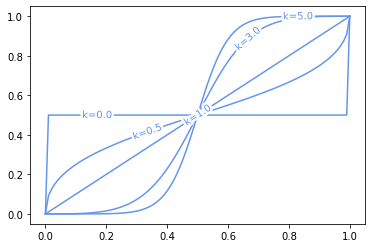

In [5]:
i = 0.01
xs = np.arange(0, 1 + i, i)
ks = np.concatenate((np.arange(0, 1, 0.5), np.arange(1, 6, 2)), axis=None)
for k in ks:
    f = utilities.unit_sigmoid(k)
    ys = [f(x) for x in xs]
    plt.plot(xs, ys, color='cornflowerblue', label=f'k={k}')
labelLines(plt.gca().get_lines(), zorder=2.5)
plt.show()

<font color=green>

_____

<font color=maroon>

## 3. Exponential

The exponential function can be used within the water module to escalate the costs of groundwater pumping, for increasing groundwater deficits.

The **exponential()** is a closure that parameterize and then returns an exponential function.

#### utilities.exponential(base: float, r: float)

The *exponential()* function is in the form:

> $f(base, r, x) = base(1 + r)^x$

It takes arguments for the base, and r parameters, where:

1. **base**: float - a base value such that $f(0) = b$
2. **r**: float - a rate of exponential growth ($r > 0$) or decay ($r < 0$)

It returns an exponential function in the form:

> $f(x) = base(1 + r)^x$

that accepts a single parameter x.

The code block below returns a family of exponential growth functions that vary in the growth rate parameter **r**.

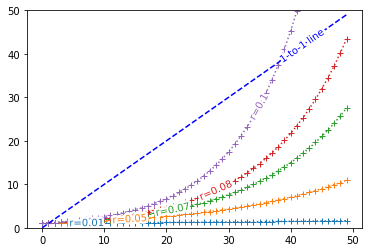

In [6]:
ys = []
xs = range(0, 50, 1)
for r in [0.01, 0.05, 0.07, 0.08, 0.10]:   
    label = f'r={r}'
    f = utilities.exponential(base=1, r=r)
    ys.clear()
    for x in xs:
        ys.append(f(x))
    plt.plot(xs, ys, '+:', label=label)
plt.plot(xs, '--b', label='1-to-1 line')
plt.ylim((0, 50))
labelLines(plt.gca().get_lines(), zorder=2.5)
plt.show() 

<font color=maroon>

The *scipy* integrate function is by the groundwater function to compute the total cost of pumping on the domain [a, b], given an initial deficit of a. This is disussed in the water notebook.

**Note**

* for r = 0, the default value the function is linear with respect to x.

________